# 4/8/2021

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

pd.set_option("display.max_columns",100)

In [ ]:
df = pd.read_csv("Bank Campaign Data.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Age column:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


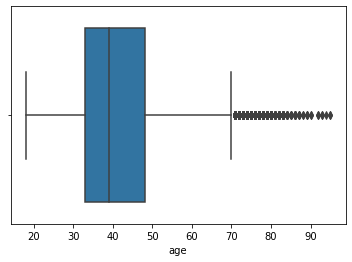

In [ ]:
sns.boxplot(df['age'])

In [ ]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)

iqr = q3 -q1
print(iqr)
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

df2 = df[((df['age']<lower_fence)|(df['age']>upper_fence))]
print("number of outliers in age:" + str(df2.shape[0]))

15.0
number of outliers in age:487


In [ ]:
for i,data in df.iterrows():
    if data['age'] < lower_fence:
        df.at[i,'age'] = lower_fence
    if data['age'] > upper_fence:
        df.at[i,'age'] = upper_fence

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


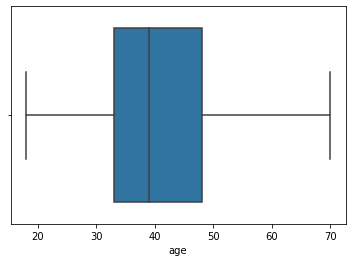

In [ ]:
sns.boxplot(df['age'])

## Job Column:

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['job_label'] =df['job']

for i, data in df.iterrows():
    if data['job'] == 'blue-collar':
        df.at[i,'job_label'] = 0
    elif data['job'] == 'management':
        df.at[i,'job_label'] = 1
    elif data['job'] == 'technician':
        df.at[i,'job_label'] = 2
    elif data['job'] == 'admin.':
        df.at[i,'job_label'] = 3
    elif data['job'] == 'services':
        df.at[i,'job_label'] = 4
    elif data['job'] == 'retired':
        df.at[i,'job_label'] = 5
    elif data['job'] == 'self-employed':
        df.at[i,'job_label'] = 6
    elif data['job'] == 'entrepreneur':
        df.at[i,'job_label'] = 7
    elif data['job'] == 'unemployed':
        df.at[i,'job_label'] = 8
    elif data['job'] == 'housemaid':
        df.at[i,'job_label'] = 9
    elif data['job'] == 'student':
        df.at[i,'job_label'] = 10
    elif data['job'] == 'unknown':
        df.at[i,'job_label'] = 11

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2
45207,70,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5
45208,70,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,5
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


## Marital column:

In [ ]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df['marital_label'] =df['marital']

for i, data in df.iterrows():
    if data['marital'] == 'married':
        df.at[i,'marital_label'] = 0
    elif data['marital'] == 'single':
        df.at[i,'marital_label'] = 1
    elif data['marital'] == 'divorced':
        df.at[i,'marital_label'] = 2

In [ ]:
df['marital_label'].value_counts()

0    27214
1    12790
2     5207
Name: marital_label, dtype: int64

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2,0
45207,70,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,2
45208,70,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0


## Education column:

In [ ]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
df['education_label'] =df['education']

for i, data in df.iterrows():
    if data['education'] == 'primary':
        df.at[i,'education_label'] = 1
    elif data['education'] == 'secondary':
        df.at[i,'education_label'] = 2
    elif data['education'] == 'tertiary':
        df.at[i,'education_label'] = 3
    else:
        df.at[i,'education_label'] = 0

In [ ]:
df['education_label'] = df['education_label'].astype(int)
df['education_label']

0        3
1        2
2        2
3        0
4        0
        ..
45206    3
45207    1
45208    2
45209    2
45210    2
Name: education_label, Length: 45211, dtype: int64

In [ ]:
df['education_label'].value_counts()

2    23202
3    13301
1     6851
0     1857
Name: education_label, dtype: int64

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0,3
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,1,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7,0,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2,0,3
45207,70,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,2,1
45208,70,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,0,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,2


## Default columns

In [ ]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [ ]:
df['default_label'] =df['default']

for i, data in df.iterrows():
    if data['default'] == 'no':
        df.at[i,'default_label'] = 0
    elif data['default'] == 'yes':
        df.at[i,'default_label'] = 1

In [ ]:
df['default_label'] = df['default_label'].astype(int)
df['default_label']

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: default_label, Length: 45211, dtype: int64

In [ ]:
df['default_label'].value_counts()

0    44396
1      815
Name: default_label, dtype: int64

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label,default_label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0,3,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,1,2,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7,0,2,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2,0,3,0
45207,70,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,2,1,0
45208,70,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,0,2,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,2,0


## Balance columns:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


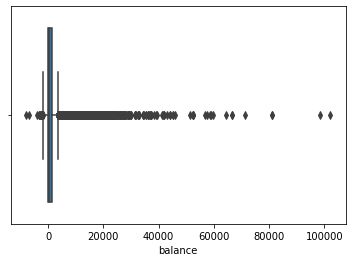

In [ ]:
sns.boxplot(df['balance'])

In [ ]:
df[df['balance'] >20000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label,default_label
334,45,management,divorced,tertiary,no,24598,yes,no,unknown,5,may,313,3,-1,0,unknown,no,1,2,3,0
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes,2,1,0,0
920,44,admin.,married,secondary,no,58544,yes,no,unknown,7,may,144,2,-1,0,unknown,no,3,0,2,0
2343,26,technician,single,secondary,no,24299,yes,no,unknown,13,may,704,1,-1,0,unknown,no,2,1,2,0
2554,28,technician,single,secondary,no,26765,no,no,unknown,13,may,210,8,-1,0,unknown,no,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43953,70,retired,married,secondary,no,29941,no,no,telephone,18,jun,80,1,71,3,other,no,5,0,2,0
44050,70,retired,divorced,primary,no,29080,no,no,cellular,30,jun,301,5,93,4,other,yes,5,2,1,0
44232,45,management,married,tertiary,no,31472,no,no,cellular,19,jul,568,7,-1,0,unknown,yes,1,0,3,0
44521,42,management,married,tertiary,no,27696,no,no,cellular,11,aug,370,1,91,7,success,yes,1,0,3,0


In [ ]:
df[df['balance'] <0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label,default_label
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no,3,0,2,0
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no,1,1,2,0
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no,0,0,2,0
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no,2,0,2,0
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes,4,1,2,0
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes,0,1,2,0
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no,0,0,1,0
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no,1,2,3,0


In [ ]:
q1 = df['balance'].quantile(0.25)
q3 = df['balance'].quantile(0.75)

iqr = q3 -q1
print(iqr)
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

df2 = df[((df['balance']<lower_fence)|(df['balance']>upper_fence))]
print("number of outliers in balance: " + str(df2.shape[0]))

1356.0
number of outliers in balance: 4729


In [ ]:

for i,data in df.iterrows():
    if data['balance'] < lower_fence:
        df.at[i,'balance'] = lower_fence
    if data['balance'] > upper_fence:
        df.at[i,'balance'] = upper_fence

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


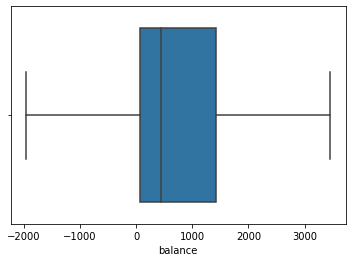

In [ ]:
sns.boxplot(df['balance'])

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label,default_label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0,3,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,1,2,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7,0,2,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2,0,3,0
45207,70,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,2,1,0
45208,70,retired,married,secondary,no,3462,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,0,2,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,2,0


# Housing column:

In [ ]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
df['housing_label'] =df['housing']

for i, data in df.iterrows():
    if data['housing'] == 'no':
        df.at[i,'housing_label'] = 0
    elif data['housing'] == 'yes':
        df.at[i,'housing_label'] = 1

In [ ]:
df['housing_label'] = df['housing_label'].astype(int)
df['housing_label']

0        1
1        1
2        1
3        1
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: housing_label, Length: 45211, dtype: int64

In [ ]:
df['housing_label'].value_counts()

1    25130
0    20081
Name: housing_label, dtype: int64

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label,default_label,housing_label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0,3,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,1,2,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7,0,2,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2,0,3,0,0
45207,70,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,2,1,0,0
45208,70,retired,married,secondary,no,3462,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,0,2,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,2,0,0


# Loan label:

In [ ]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [ ]:
df['loan_label'] =df['loan']

for i, data in df.iterrows():
    if data['loan'] == 'no':
        df.at[i,'loan_label'] = 0
    elif data['loan'] == 'yes':
        df.at[i,'loan_label'] = 1
        
df['loan_label'] = df['loan_label'].astype(int)
df['loan_label'].value_counts()

0    37967
1     7244
Name: loan_label, dtype: int64

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label,default_label,housing_label,loan_label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0,3,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,1,2,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7,0,2,0,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2,0,3,0,0,0
45207,70,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,2,1,0,0,0
45208,70,retired,married,secondary,no,3462,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,0,2,0,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,2,0,0,0


# contact column

In [ ]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
df['contact_label'] =df['contact']

for i, data in df.iterrows():
    if data['contact'] == 'unknown':
        df.at[i,'contact_label'] = 0
    elif data['contact'] == 'cellular':
        df.at[i,'contact_label'] = 1
    elif data['contact'] == 'telephone':
        df.at[i,'contact_label'] = 2
        
        
df['contact_label'] = df['contact_label'].astype(int)
df['contact_label'].value_counts()

1    29285
0    13020
2     2906
Name: contact_label, dtype: int64

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label,default_label,housing_label,loan_label,contact_label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0,3,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,1,2,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7,0,2,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2,0,3,0,0,0,1
45207,70,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,2,1,0,0,0,1
45208,70,retired,married,secondary,no,3462,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,0,2,0,0,0,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,2,0,0,0,2


# day column

In [ ]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

# Month column

In [ ]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [ ]:
df['month_label'] =df['month']

for i, data in df.iterrows():
    if data['month'] == 'jan':
        df.at[i,'month_label'] = 1
    elif data['month'] == 'feb':
        df.at[i,'month_label'] = 2
    elif data['month'] == 'mar':
        df.at[i,'month_label'] = 3
    elif data['month'] == 'apr':
        df.at[i,'month_label'] = 4
    elif data['month'] == 'may':
        df.at[i,'month_label'] = 5
    elif data['month'] == 'jun':
        df.at[i,'month_label'] = 6
    elif data['month'] == 'jul':
        df.at[i,'month_label'] = 7
    elif data['month'] == 'aug':
        df.at[i,'month_label'] = 8
    elif data['month'] == 'sep':
        df.at[i,'month_label'] = 9
    elif data['month'] == 'oct':
        df.at[i,'month_label'] = 10
    elif data['month'] == "nov":
        df.at[i,'month_label'] = 11
    elif data['month'] == 'dec':
        df.at[i,'month_label'] = 12
        
df['month_label'] = df['month_label'].astype(int)
df['month_label'].value_counts()

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month_label, dtype: int64

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label,default_label,housing_label,loan_label,contact_label,month_label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0,3,0,1,0,0,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,1,2,0,1,0,0,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7,0,2,0,1,1,0,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,0,0,1,0,0,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,1,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2,0,3,0,0,0,1,11
45207,70,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,2,1,0,0,0,1,11
45208,70,retired,married,secondary,no,3462,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,0,2,0,0,0,1,11
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,2,0,0,0,2,11


# duration column:

In [ ]:
df['duration'].value_counts()

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

# campaign column

In [ ]:
df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [ ]:
df[df['campaign'] ==63]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label,default_label,housing_label,loan_label,contact_label,month_label
4330,45,management,married,unknown,no,3462,yes,no,unknown,19,may,124,63,-1,0,unknown,no,1,0,0,0,1,0,0,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


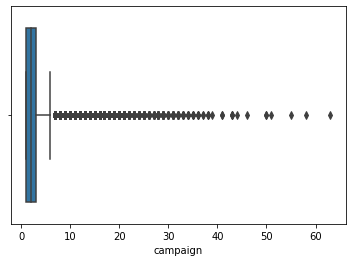

In [ ]:
sns.boxplot(df['campaign'])

In [ ]:
q1 = df['campaign'].quantile(0.25)
q3 = df['campaign'].quantile(0.75)

iqr = q3 -q1
print(iqr)
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

df2 = df[((df['campaign']<lower_fence)|(df['campaign']>upper_fence))]
print("number of outliers in campaign: " + str(df2.shape[0]))


2.0
number of outliers in campaign: 3064


In [ ]:

for i,data in df.iterrows():
    if data['campaign'] < lower_fence:
        df.at[i,'campaign'] = lower_fence
    if data['campaign'] > upper_fence:
        df.at[i,'campaign'] = upper_fence

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


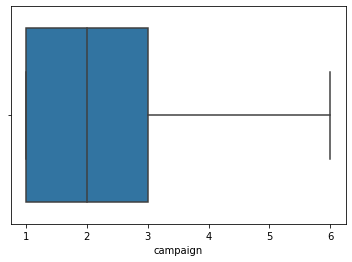

In [ ]:
sns.boxplot(df['campaign'])

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label,default_label,housing_label,loan_label,contact_label,month_label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0,3,0,1,0,0,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,1,2,0,1,0,0,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7,0,2,0,1,1,0,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,0,0,1,0,0,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,1,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2,0,3,0,0,0,1,11
45207,70,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,2,1,0,0,0,1,11
45208,70,retired,married,secondary,no,3462,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,0,2,0,0,0,1,11
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,2,0,0,0,2,11


# pdays column

In [ ]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

# previous column

In [ ]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [ ]:
df = df[~(df['previous']  ==  275)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


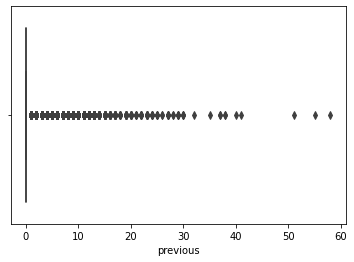

In [ ]:
sns.boxplot(df['previous'])

# poutcome column

In [ ]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1839
success     1511
Name: poutcome, dtype: int64

In [ ]:
df['poutcome_label'] =df['poutcome']

for i, data in df.iterrows():
    if data['poutcome'] == 'unknown':
        df.at[i,'poutcome_label'] = -1
    elif data['poutcome'] == 'success':
        df.at[i,'poutcome_label'] = 1
    elif data['poutcome'] == 'failure':
        df.at[i,'poutcome_label'] = 0
    elif data['poutcome'] == 'other':
        df.at[i,'poutcome_label'] = -1


df['poutcome_label'] = df['poutcome_label'].astype(int)
df['poutcome_label'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


-1    38798
 0     4901
 1     1511
Name: poutcome_label, dtype: int64

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label,default_label,housing_label,loan_label,contact_label,month_label,poutcome_label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0,3,0,1,0,0,5,-1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,1,2,0,1,0,0,5,-1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7,0,2,0,1,1,0,5,-1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,0,0,1,0,0,5,-1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,1,0,0,0,0,0,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2,0,3,0,0,0,1,11,-1
45207,70,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,2,1,0,0,0,1,11,-1
45208,70,retired,married,secondary,no,3462,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,0,2,0,0,0,1,11,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,2,0,0,0,2,11,-1


# y column

In [ ]:
df['target'] = df['y']
for i, data in df.iterrows():
    if data['y'] == 'no':
        df.at[i,'target'] = 0
    else:
        df.at[i,'target'] = 1

df['target'] = df['target'].astype(int)
df['target'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    39921
1     5289
Name: target, dtype: int64

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_label,marital_label,education_label,default_label,housing_label,loan_label,contact_label,month_label,poutcome_label,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0,3,0,1,0,0,5,-1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,1,2,0,1,0,0,5,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7,0,2,0,1,1,0,5,-1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,0,0,1,0,0,5,-1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,11,1,0,0,0,0,0,5,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2,0,3,0,0,0,1,11,-1,1
45207,70,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,5,2,1,0,0,0,1,11,-1,1
45208,70,retired,married,secondary,no,3462,no,no,cellular,17,nov,1127,5,184,3,success,yes,5,0,2,0,0,0,1,11,1,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,2,0,0,0,2,11,-1,0


# dropping all the non-numeric columns:

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_label', 'marital_label',
       'education_label', 'default_label', 'housing_label', 'loan_label',
       'contact_label', 'month_label', 'poutcome_label', 'target'],
      dtype='object')

In [ ]:
drop_list = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

In [ ]:
df_numeric = df.drop(drop_list,axis=1)
df_numeric

,age,balance,day,duration,campaign,pdays,previous,job_label,marital_label,education_label,default_label,housing_label,loan_label,contact_label,month_label,poutcome_label,target
0,58,2143,5,261,1,-1,0,1,0,3,0,1,0,0,5,-1,0
1,44,29,5,151,1,-1,0,2,1,2,0,1,0,0,5,-1,0
2,33,2,5,76,1,-1,0,7,0,2,0,1,1,0,5,-1,0
3,47,1506,5,92,1,-1,0,0,0,0,0,1,0,0,5,-1,0
4,33,1,5,198,1,-1,0,11,1,0,0,0,0,0,5,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,2,0,3,0,0,0,1,11,-1,1
45207,70,1729,17,456,2,-1,0,5,2,1,0,0,0,1,11,-1,1
45208,70,3462,17,1127,5,184,3,5,0,2,0,0,0,1,11,1,1
45209,57,668,17,508,4,-1,0,0,0,2,0,0,0,2,11,-1,0


# numeric to categorical conversion (binning):

In [ ]:
df_numeric['campaign'].value_counts()

1    17544
2    12504
3     5521
6     4355
4     3522
5     1764
Name: campaign, dtype: int64

In [ ]:
df_numeric['Categorical_age']=pd.cut(df_numeric['age'],5)
df_numeric['Categorical_balance']=pd.cut(df_numeric['balance'],5)
df_numeric['Categorical_day']=pd.cut(df_numeric['day'],5)
df_numeric['Categorical_duration']=pd.cut(df_numeric['duration'],5)
df_numeric['Categorical_pdays']=pd.cut(df_numeric['pdays'],5)
df_numeric['Categorical_previous']=pd.cut(df_numeric['previous'],5)

In [ ]:
df_numeric

,age,balance,day,duration,campaign,pdays,previous,job_label,marital_label,education_label,default_label,housing_label,loan_label,contact_label,month_label,poutcome_label,target,Categorical_age,Categorical_balance,Categorical_day,Categorical_duration,Categorical_pdays,Categorical_previous
0,58,2143,5,261,1,-1,0,1,0,3,0,1,0,0,5,-1,0,"(49.2, 59.6]","(1292.4, 2377.2]","(0.97, 7.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]"
1,44,29,5,151,1,-1,0,2,1,2,0,1,0,0,5,-1,0,"(38.8, 49.2]","(-877.2, 207.6]","(0.97, 7.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]"
2,33,2,5,76,1,-1,0,7,0,2,0,1,1,0,5,-1,0,"(28.4, 38.8]","(-877.2, 207.6]","(0.97, 7.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]"
3,47,1506,5,92,1,-1,0,0,0,0,0,1,0,0,5,-1,0,"(38.8, 49.2]","(1292.4, 2377.2]","(0.97, 7.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]"
4,33,1,5,198,1,-1,0,11,1,0,0,0,0,0,5,-1,0,"(28.4, 38.8]","(-877.2, 207.6]","(0.97, 7.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,2,0,3,0,0,0,1,11,-1,1,"(49.2, 59.6]","(207.6, 1292.4]","(13.0, 19.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]"
45207,70,1729,17,456,2,-1,0,5,2,1,0,0,0,1,11,-1,1,"(59.6, 70.0]","(1292.4, 2377.2]","(13.0, 19.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]"
45208,70,3462,17,1127,5,184,3,5,0,2,0,0,0,1,11,1,1,"(59.6, 70.0]","(2377.2, 3462.0]","(13.0, 19.0]","(983.6, 1967.2]","(173.4, 347.8]","(-0.058, 11.6]"
45209,57,668,17,508,4,-1,0,0,0,2,0,0,0,2,11,-1,0,"(49.2, 59.6]","(207.6, 1292.4]","(13.0, 19.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]"


# Label Encoding

In [ ]:
df_numeric['Categorical_age'] = df_numeric['Categorical_age'].astype('category')
df_numeric['Categorical_age_encode'] = df_numeric['Categorical_age'].cat.codes


df_numeric['Categorical_balance'] = df_numeric['Categorical_balance'].astype('category')
df_numeric['Categorical_balance_encode'] = df_numeric['Categorical_balance'].cat.codes

df_numeric['Categorical_day'] = df_numeric['Categorical_day'].astype('category')
df_numeric['Categorical_day_encode'] = df_numeric['Categorical_day'].cat.codes

df_numeric['Categorical_pdays'] = df_numeric['Categorical_pdays'].astype('category')
df_numeric['Categorical_pdays_encode'] = df_numeric['Categorical_pdays'].cat.codes

df_numeric['Categorical_previous'] = df_numeric['Categorical_previous'].astype('category')
df_numeric['Categorical_previous_encode'] = df_numeric['Categorical_previous'].cat.codes

df_numeric['Categorical_duration'] = df_numeric['Categorical_duration'].astype('category')
df_numeric['Categorical_duration_encode'] = df_numeric['Categorical_duration'].cat.codes

In [ ]:
df_numeric

,age,balance,day,duration,campaign,pdays,previous,job_label,marital_label,education_label,default_label,housing_label,loan_label,contact_label,month_label,poutcome_label,target,Categorical_age,Categorical_balance,Categorical_day,Categorical_duration,Categorical_pdays,Categorical_previous,Categorical_age_encode,Categorical_balance_encode,Categorical_day_encode,Categorical_pdays_encode,Categorical_previous_encode,Categorical_duration_encode
0,58,2143,5,261,1,-1,0,1,0,3,0,1,0,0,5,-1,0,"(49.2, 59.6]","(1292.4, 2377.2]","(0.97, 7.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]",3,3,0,0,0,0
1,44,29,5,151,1,-1,0,2,1,2,0,1,0,0,5,-1,0,"(38.8, 49.2]","(-877.2, 207.6]","(0.97, 7.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]",2,1,0,0,0,0
2,33,2,5,76,1,-1,0,7,0,2,0,1,1,0,5,-1,0,"(28.4, 38.8]","(-877.2, 207.6]","(0.97, 7.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]",1,1,0,0,0,0
3,47,1506,5,92,1,-1,0,0,0,0,0,1,0,0,5,-1,0,"(38.8, 49.2]","(1292.4, 2377.2]","(0.97, 7.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]",2,3,0,0,0,0
4,33,1,5,198,1,-1,0,11,1,0,0,0,0,0,5,-1,0,"(28.4, 38.8]","(-877.2, 207.6]","(0.97, 7.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]",1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,2,0,3,0,0,0,1,11,-1,1,"(49.2, 59.6]","(207.6, 1292.4]","(13.0, 19.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]",3,2,2,0,0,0
45207,70,1729,17,456,2,-1,0,5,2,1,0,0,0,1,11,-1,1,"(59.6, 70.0]","(1292.4, 2377.2]","(13.0, 19.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]",4,3,2,0,0,0
45208,70,3462,17,1127,5,184,3,5,0,2,0,0,0,1,11,1,1,"(59.6, 70.0]","(2377.2, 3462.0]","(13.0, 19.0]","(983.6, 1967.2]","(173.4, 347.8]","(-0.058, 11.6]",4,4,2,1,0,1
45209,57,668,17,508,4,-1,0,0,0,2,0,0,0,2,11,-1,0,"(49.2, 59.6]","(207.6, 1292.4]","(13.0, 19.0]","(-4.918, 983.6]","(-1.872, 173.4]","(-0.058, 11.6]",3,2,2,0,0,0


In [ ]:
df_numeric.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_label', 'marital_label', 'education_label', 'default_label',
       'housing_label', 'loan_label', 'contact_label', 'month_label',
       'poutcome_label', 'target', 'Categorical_age', 'Categorical_balance',
       'Categorical_day', 'Categorical_duration', 'Categorical_pdays',
       'Categorical_previous', 'Categorical_age_encode',
       'Categorical_balance_encode', 'Categorical_day_encode',
       'Categorical_pdays_encode', 'Categorical_previous_encode',
       'Categorical_duration_encode'],
      dtype='object')

In [ ]:
drop_list2 = ['age', 'balance', 'day', 'duration','pdays', 'previous','Categorical_age', 'Categorical_balance',
       'Categorical_day', 'Categorical_pdays', 'Categorical_previous',
       'Categorical_duration']

df_label = df_numeric.drop(drop_list2,axis=1)
df_label

,campaign,job_label,marital_label,education_label,default_label,housing_label,loan_label,contact_label,month_label,poutcome_label,target,Categorical_age_encode,Categorical_balance_encode,Categorical_day_encode,Categorical_pdays_encode,Categorical_previous_encode,Categorical_duration_encode
0,1,1,0,3,0,1,0,0,5,-1,0,3,3,0,0,0,0
1,1,2,1,2,0,1,0,0,5,-1,0,2,1,0,0,0,0
2,1,7,0,2,0,1,1,0,5,-1,0,1,1,0,0,0,0
3,1,0,0,0,0,1,0,0,5,-1,0,2,3,0,0,0,0
4,1,11,1,0,0,0,0,0,5,-1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,2,0,3,0,0,0,1,11,-1,1,3,2,2,0,0,0
45207,2,5,2,1,0,0,0,1,11,-1,1,4,3,2,0,0,0
45208,5,5,0,2,0,0,0,1,11,1,1,4,4,2,1,0,1
45209,4,0,0,2,0,0,0,2,11,-1,0,3,2,2,0,0,0


# One Hot Encoding:

In [ ]:
# df_cleaned = pd.concat([df_label,pd.get_dummies(df_cleaned['Pclass'],prefix='class')], axis=1)

# checking for collinearity among columns

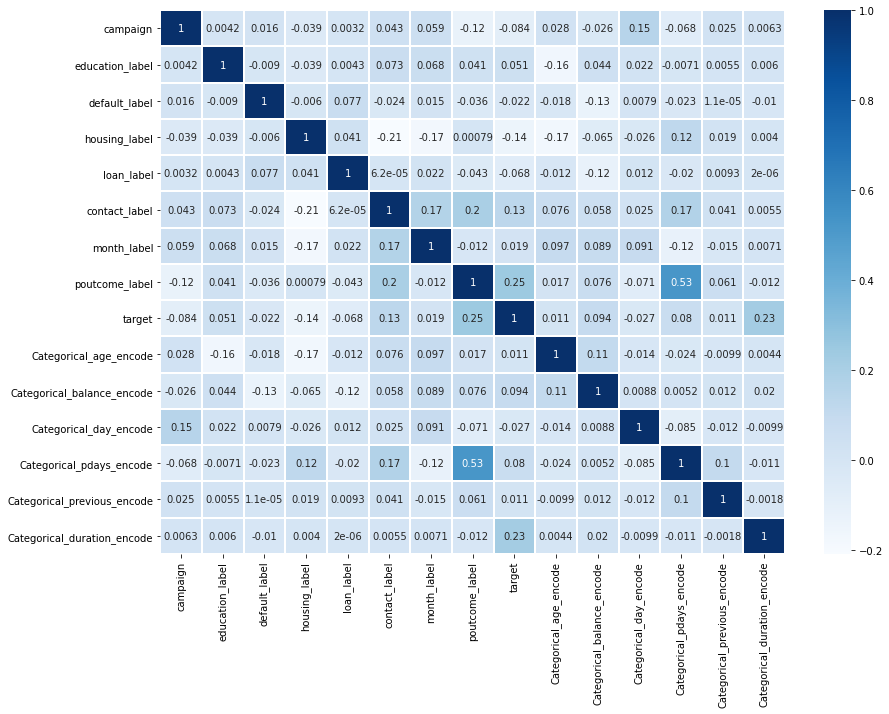

In [ ]:
import seaborn as sns

colormap = plt.cm.Blues

plt.figure(figsize=(14,10))
sns.heatmap(df_label.corr(),cmap = colormap,annot=True,linewidths=1)

# balancing out the target

In [ ]:
df_label['target'].value_counts()

0    39921
1     5289
Name: target, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

X = df_label.drop('target',axis=1)
y = df_label['target']
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)


print("Shape of X before SMOTE: ",X.shape)
print("Shape of X after SMOTE: ",X_sm.shape)


#print("class balance:\n", y_sm.value_count(normalize=True) * 100)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Shape of X before SMOTE:  (45210, 16)
Shape of X after SMOTE:  (79842, 16)


In [ ]:
y_sm.shape

(79842,)

# train test split:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=5, shuffle=True)

# As this is a classification problem, we will try out several models:

## 1) KNN classifier model:

In [ ]:
# # we try finding the optimal value of k to get best performance of knn

# from sklearn.neighbors import KNeighborsClassifier

# acc = []

# from sklearn import metrics
# for i in range(1,40):
#     knn = KNeighborsClassifier(n_neighbors = i).f it(X_train,y_train)
#     ypred_knn = knn.predict(X_test)
#     acc.append(metrics.accuracy_score(y_test, ypred_knn))
    
# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
#          marker='o',markerfacecolor='red', markersize=10)
# plt.title('accuracy vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Accuracy')
# print("Maximum accuracy: ",max(acc),"at k =",acc.index(max(acc))+1)

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      8007
           1       0.88      0.92      0.90      7962

    accuracy                           0.90     15969
   macro avg       0.90      0.90      0.90     15969
weighted avg       0.90      0.90      0.90     15969


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-

model accuracy:  0.9013714071012587
model precision:  0.8842497894356877
model recall:  0.9230092941471992
model f1-score:  0.9032139126159896

-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-

Confusion Martix


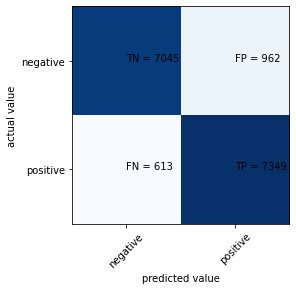

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
ypred_knn = knn.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


cm4 = confusion_matrix(y_test,ypred_knn)
print("Classification Report: ")
print(classification_report(y_test,ypred_knn))
print()
print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
print()
print("model accuracy: ",accuracy_score(y_test, ypred_knn))
print("model precision: ",precision_score(y_test, ypred_knn))
print("model recall: ",recall_score(y_test, ypred_knn))
print("model f1-score: ",f1_score(y_test, ypred_knn))
print()
print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
print()
print("Confusion Martix")
plt.clf()
plt.imshow(cm4,interpolation='nearest',cmap = plt.cm.Blues)
classnames = ['negative','positive']
tick_marks = np.arange(len(classnames))
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.xticks(tick_marks,classnames,rotation=45)
plt.yticks(tick_marks,classnames)
s = [['TN','FP'],['FN','TP']]


for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm4[i][j]))
plt.show()

## 2) SVM

In [ ]:
# from sklearn.svm import SVC

# svc = SVC(kernel='rbf',probability= True)
# svc.fit(X_train,y_train)

# y_pred_rbf = svc.predict(X_test)

# from sklearn.metrics import classification_report, confusion_matrix

# cm3 = confusion_matrix(y_test,y_pred_rbf)
# print("CLASSIFICATION REPORT:")
# print(classification_report(y_test,y_pred_rbf))
# print()
# print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
# print()
# print("model accuracy: ",accuracy_score(y_test, y_pred_rbf))
# print("model precision: ",precision_score(y_test, y_pred_rbf))
# print("model recall: ",recall_score(y_test, y_pred_rbf))
# print("model f1-score: ",f1_score(y_test, y_pred_rbf))
# print()
# print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
# print()
# print("CONFUSION MATRIX: ")
# plt.clf()
# plt.imshow(cm3,interpolation='nearest',cmap = plt.cm.Blues)
# classnames = ['negative','positive']
# tick_marks = np.arange(len(classnames))
# plt.xlabel("predicted value")
# plt.ylabel("actual value")
# plt.xticks(tick_marks,classnames,rotation=45)
# plt.yticks(tick_marks,classnames)
# s = [['TN','FP'],['FN','TP']]


# for i in range(2):
#     for j in range(2):
#         plt.text(j,i,str(s[i][j])+" = "+str(cm3[i][j]))
# plt.show()

## 2) Random Forest Classifie (hyper parameter tuning using GridSearchCV)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [ ]:
# parameters = {
#     "n_estimators": [100, 150, 200, 250, 300],
#     "max_depth": [1, 3, 5, 7]
# }

# c = GridSearchCV(rfc, parameters, cv=5)
# c.fit(X_train, y_train)


# def display(results):
#     print("best params are: ", results.best_params_)
    
# display(c)

# cdict = c.best_params_
# maxdepth  = cdict['max_depth']
# print(maxdepth)
# n_est = cdict['n_estimators']
# print(n_est)


# rfc = RandomForestClassifier(max_depth= maxdepth, n_estimators=n_est)
# rfc.fit(X_train, y_train)
# y_pred_rfc = rfc.predict(X_test)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      8007
           1       0.95      0.92      0.94      7962

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-

model accuracy:  0.9388815830671927
model precision:  0.9535185666060764
model recall:  0.9223813112283346
model f1-score:  0.9376915219611849

-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-

CONFUSION MATRIX: 


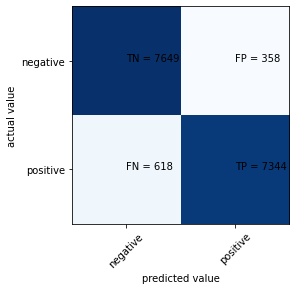

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


cm2 = confusion_matrix(y_test, y_pred_rfc)
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pred_rfc))
print()
print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
print()
print("model accuracy: ",accuracy_score(y_test, y_pred_rfc))
print("model precision: ",precision_score(y_test, y_pred_rfc))
print("model recall: ",recall_score(y_test, y_pred_rfc))
print("model f1-score: ",f1_score(y_test, y_pred_rfc))
print()
print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
print()
print("CONFUSION MATRIX: ")
plt.clf()
plt.imshow(cm2,interpolation='nearest',cmap = plt.cm.Blues)
classnames = ['negative','positive']
tick_marks = np.arange(len(classnames))
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.xticks(tick_marks,classnames,rotation=45)
plt.yticks(tick_marks,classnames)
s = [['TN','FP'],['FN','TP']]


for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm2[i][j]))
plt.show()

## 3) Gradient Boost Classifier  (hyper parameter tuning using GridSearchCV)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier()

In [ ]:
# parameters = {
#     "n_estimators": [100, 150, 200, 250, 300],
#     "max_depth": [1, 3, 5],
#     "learning_rate": [0.01, 0.1, 1]
# }

# c = GridSearchCV(gbc, parameters, cv=5)
# c.fit(X_train, np.ravel(y_train, order='C'))


# def display(results):
#     print("best params are: ", results.best_params_)
    
# display(c)

# cdict = c.best_params_
# nestimators=cdict['n_estimators']
# learningrate=cdict['learning_rate']
# maxdepth=cdict['max_depth']

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8007
           1       0.93      0.87      0.90      7962

    accuracy                           0.90     15969
   macro avg       0.91      0.90      0.90     15969
weighted avg       0.91      0.90      0.90     15969


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-

model accuracy:  0.9033126682948213
model precision:  0.9317814854682455
model recall:  0.8697563426274806
model f1-score:  0.89970118227881

-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-

Confusion Martix:


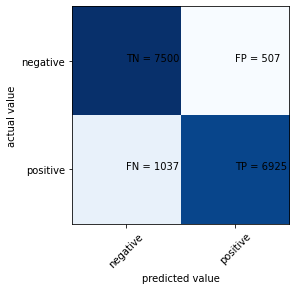

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


#gbc = GradientBoostingClassifier(n_estimators=nestimators, learning_rate=learningrate, max_depth=maxdepth)
#gbc = GradientBoostingClassifier(n_estimators=250, learning_rate=0.01, max_depth=1)
gbc.fit(X_train, np.ravel(y_train,order='C'))
y_pred = gbc.predict(X_test)

cm5 = confusion_matrix(y_test, y_pred)

print("Classification Report: ")
print(classification_report(y_test,y_pred))
print()
print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
print()


print("model accuracy: ",accuracy_score(y_test, y_pred))
print("model precision: ",precision_score(y_test, y_pred))
print("model recall: ",recall_score(y_test, y_pred))
print("model f1-score: ",f1_score(y_test, y_pred))
print()
print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
print()

print("Confusion Martix:")
plt.clf()
plt.imshow(cm5,interpolation='nearest',cmap = plt.cm.Blues)
classnames = ['negative','positive']
tick_marks = np.arange(len(classnames))
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.xticks(tick_marks,classnames,rotation=45)
plt.yticks(tick_marks,classnames)
s = [['TN','FP'],['FN','TP']]


for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm5[i][j]))
plt.show()

## 4) Naive Bayes Classifier:

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      8007
           1       0.74      0.68      0.71      7962

    accuracy                           0.72     15969
   macro avg       0.72      0.72      0.72     15969
weighted avg       0.72      0.72      0.72     15969


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-

model accuracy:  0.7212724654017159
model precision:  0.7384218389243515
model recall:  0.6828686259733735
model f1-score:  0.7095595432300162

-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-

CONFUSION MATRIX:


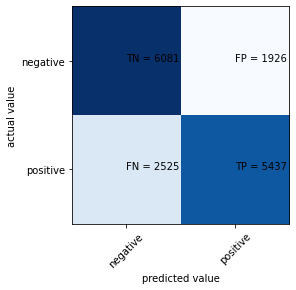

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

y_pred3 =nb.predict(X_test)


cm6 = confusion_matrix(y_test,y_pred3)

print("Classification Report: ")
print(classification_report(y_test,y_pred3))
print()
print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
print()
print("model accuracy: ",accuracy_score(y_test, y_pred3))
print("model precision: ",precision_score(y_test, y_pred3))
print("model recall: ",recall_score(y_test, y_pred3))
print("model f1-score: ",f1_score(y_test, y_pred3))
print()
print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
print()
print("CONFUSION MATRIX:")
plt.clf()
plt.imshow(cm6,interpolation='nearest',cmap = plt.cm.Blues)
classnames = ['negative','positive']
tick_marks = np.arange(len(classnames))
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.xticks(tick_marks,classnames,rotation=45)
plt.yticks(tick_marks,classnames)
s = [['TN','FP'],['FN','TP']]


for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm6[i][j]))
plt.show()

## 5) Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print("Model accuracy: ",accuracy_score(y_test, y_pred_log))

Model accuracy:  0.7223996493205586


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      8007
           1       0.73      0.70      0.72      7962

    accuracy                           0.72     15969
   macro avg       0.72      0.72      0.72     15969
weighted avg       0.72      0.72      0.72     15969


-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-

Model accuracy:  0.7223996493205586
model precision:  0.7313491543201783
model recall:  0.7005777442853555
model f1-score:  0.7156328180127013

-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-

CONFUSION MATRIX: 


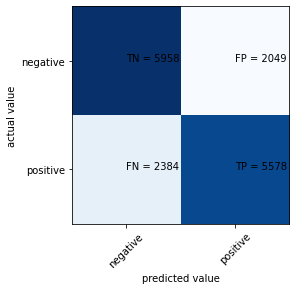

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


cm = confusion_matrix(y_test, y_pred_log)
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pred_log))
print()
print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
print()
print("Model accuracy: ",accuracy_score(y_test, y_pred_log))
print("model precision: ",precision_score(y_test, y_pred_log))
print("model recall: ",recall_score(y_test, y_pred_log))
print("model f1-score: ",f1_score(y_test, y_pred_log))
print()
print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
print()
print("CONFUSION MATRIX: ")
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap = plt.cm.Blues)
classnames = ['negative','positive']
tick_marks = np.arange(len(classnames))
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.xticks(tick_marks,classnames,rotation=45)
plt.yticks(tick_marks,classnames)
s = [['TN','FP'],['FN','TP']]


for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# ROC AUC CURVE

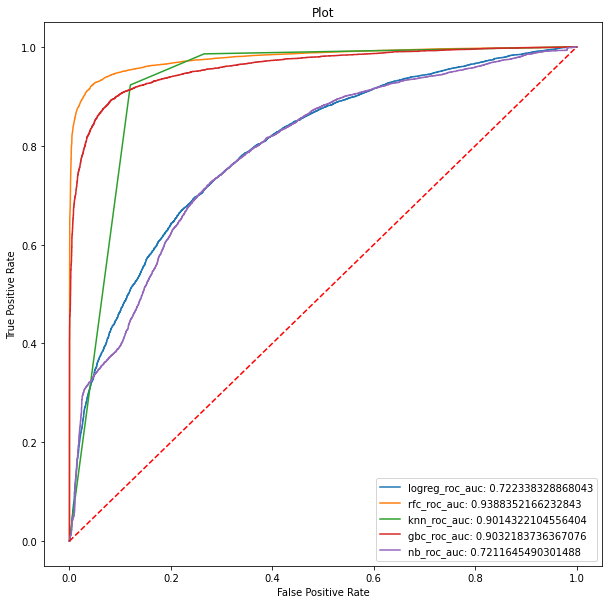

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


fpr1,tpr1,thresholds1 = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr2,tpr2,thresholds2 = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
fpr4,tpr4,thresholds4 = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
fpr5,tpr5,thresholds5 = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
fpr6,tpr6,thresholds6 = roc_curve(y_test, nb.predict_proba(X_test)[:,1])

logreg_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))

knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
gbc_roc_auc = roc_auc_score(y_test, gbc.predict(X_test))
nb_roc_auc = roc_auc_score(y_test, nb.predict(X_test))


plt.figure(figsize=(10,10))

plt.plot(fpr1,tpr1,label="logreg_roc_auc: "+str(logreg_roc_auc))
plt.plot(fpr2,tpr2,label="rfc_roc_auc: "+str(rfc_roc_auc))
plt.plot(fpr4,tpr4,label="knn_roc_auc: "+str(knn_roc_auc))
plt.plot(fpr5,tpr5,label="gbc_roc_auc: "+str(gbc_roc_auc))
plt.plot(fpr6,tpr6,label="nb_roc_auc: "+str(nb_roc_auc))

plt.plot([0,1],[0,1],'r--')
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("Plot")
plt.show()